In [1]:
%matplotlib notebook
import numpy as np                                                                 
import matplotlib.pyplot as plt                                                    
import csv                                                                         
import os

In [2]:
data_folder = os.path.expanduser("~")+"/CAE_Project/CAEs/data/"

fig_path = data_folder+"proposed_relu_balle_r_d_curve.pdf"

balle_file = data_folder+"r_d_Balle.csv"
jpeg_file = data_folder+"r_d_JPEG.csv"
jpeg2k_file = data_folder+"r_d_JPEG2k.csv"
                                                                                   
proposed_files = {
    "max_pcm":data_folder+"r_d_proposed_3072_max_compress_pcm.csv",
    "med_pcm":data_folder+"r_d_proposed_7680_med_compress_pcm.csv",
    "min_pcm":data_folder+"r_d_proposed_32768_min_compress_pcm.csv",
    "max_gau":data_folder+"r_d_proposed_3072_max_compress_gauss.csv",
    "med_gau":data_folder+"r_d_proposed_7680_med_compress_gauss.csv",
    "min_gau":data_folder+"r_d_proposed_32768_min_compress_gauss.csv",                                                                                   
    "max_pcm_relu":data_folder+"r_d_proposed_3072_max_compress_pcm_relu.csv",
    "med_pcm_relu":data_folder+"r_d_proposed_7680_med_compress_pcm_relu.csv"}

In [3]:
def csv_to_array(file):
  r_d_list = []                                                            
  with open(file, 'rt') as csvfile:                                        
    reader = csv.reader(csvfile, delimiter=',')                                   
    for row_idx, row in enumerate(reader):                                        
      if row_idx > 0: # first row is header                                       
        r_d_list.append([float(val) if val != "NA" else 0 for val in row])                       
  return(np.array(r_d_list))

In [4]:
jpeg_array = csv_to_array(jpeg_file)
jpeg2k_array = csv_to_array(jpeg2k_file)
balle_array = csv_to_array(balle_file)

In [5]:
dat_keys = ["max_pcm", "med_pcm", "min_pcm"]
#dat_keys = ["max_gau", "med_gau", "min_gau"]
proposed_array = np.vstack([csv_to_array(proposed_files[dat_key]) for dat_key in dat_keys])

### CSV Index Format:
 0. image index
 1. bits per pixel
 2. memristors per pixel
 3. PSNR
 4. MS-SSIM
 5. MSE

<IPython.core.display.Javascript object>


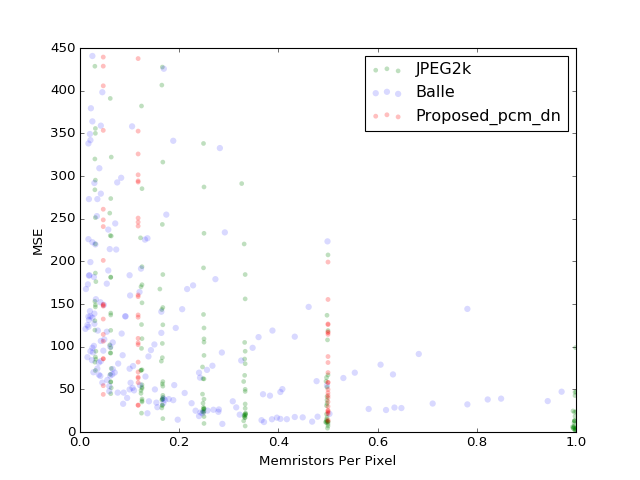

In [6]:
fig = plt.figure()                                                              
plt.scatter(jpeg2k_array[:,1], jpeg2k_array[:,5], s=18, c="g", edgecolors="none", alpha=0.25)
plt.scatter(balle_array[:,1], balle_array[:,5], s=32, c="b", edgecolors="none", alpha=0.15)
plt.scatter(proposed_array[:,2], proposed_array[:,5], s=19, c="r", edgecolors="none", alpha=0.25)
plt.ylabel("MSE")                                                               
plt.xlabel("Memristors Per Pixel")                                              
plt.ylim([0, 450])                                                              
plt.xlim([0, 1.0])                                                              
plt.legend(["JPEG2k", "Balle", "Proposed_pcm_dn"])
#plt.legend(["JPEG2k", "Balle", "Proposed_gau_dn"])
fig.show()

In [7]:
def array_means_sems(array, mean_idx=5, rate_idx=2):
    # new shape is [images, compression_levels, metrics (csv_rows)]
    array_reshape = np.array([array[np.where(array[:,0] == idx)]
                              for idx in range(int(np.max(array[:,0]))+1)])
    rates = np.mean(array_reshape[:,:,rate_idx], axis=0) #index 1 is bit/px, index 2 is mem/pix
    means = np.mean(array_reshape[:,:,mean_idx], axis=0) #index 5 is mse
    sems = np.std(array_reshape[:,:,mean_idx], axis=0)/np.sqrt(array_reshape.shape[0])
    return np.stack([rates, means, sems])

<IPython.core.display.Javascript object>


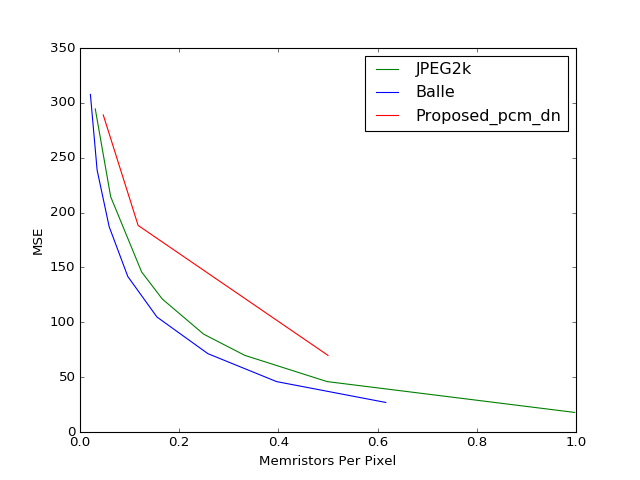

In [8]:
balle_results = array_means_sems(balle_array, 5, 1)
jpeg2k_results = array_means_sems(jpeg2k_array, 5, 1)
proposed_results = array_means_sems(proposed_array, 5, 2)

fig = plt.figure()                                                              
plt.plot(jpeg2k_results[0], jpeg2k_results[1], c="g", alpha=1)
plt.plot(balle_results[0], balle_results[1], c="b", alpha=1)
plt.plot(proposed_results[0], proposed_results[1], c="r", alpha=1)
plt.ylabel("MSE")                                                               
plt.xlabel("Memristors Per Pixel")                                              
#plt.ylim([0, 450])                                                              
#plt.xlim([0, 1.0])                                                              
plt.legend(["JPEG2k", "Balle", "Proposed_pcm_dn"])
#plt.legend(["JPEG2k", "Balle", "Proposed_gau_dn"])
fig.show()

<IPython.core.display.Javascript object>


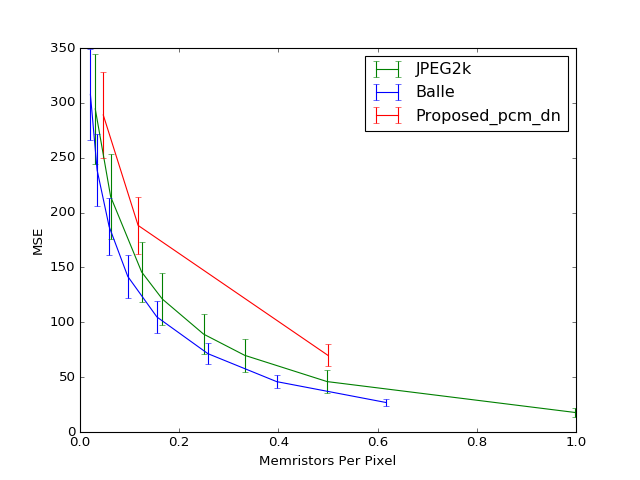

In [10]:
fig = plt.figure()                                                              
plt.errorbar(jpeg2k_results[0], jpeg2k_results[1], yerr=jpeg2k_results[2], c="g", alpha=1)
plt.errorbar(balle_results[0], balle_results[1], yerr=balle_results[2], c="b", alpha=1)
plt.errorbar(proposed_results[0], proposed_results[1], yerr=proposed_results[2], c="r", alpha=1)
plt.ylabel("MSE")                                                               
plt.xlabel("Memristors Per Pixel")                                              
#plt.ylim([0, 450])                                                              
#plt.xlim([0, 1.0])                                                              
plt.legend(["JPEG2k", "Balle", "Proposed_pcm_dn"])
#plt.legend(["JPEG2k", "Balle", "Proposed_gau_dn"])
fig.show()